Point on a line X = (x, y) lie on line (a,b,c)^T iff ax+by+c = 0

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = [1,2] #In homogeneous representation
X_h = np.array([[1,2,1]]).T # Homogeneous representation of a 2D point 
l = np.array([[1,3,4]]).T # Taking an example for a line l of x+3y+4 = 0

In [21]:
print(l[0])

[1]


In [22]:
dot_prod = np.dot(X_h.T, l)
print(dot_prod)
if(dot_prod[0][0] == 0):
    print('point ({},{}) lie on line {}x + {}y + {} = 0'.format(X_h[0][0], X_h[1][0], l[0][0], l[1][0], l[2][0]))
else:
    print('point ({},{}) does not lie on line {}x + {}y + {} = 0'.format(X_h[0][0], X_h[0][0], l[0][0], l[1][0], l[2][0]))

[[11]]
point (1,1) does not lie on line 1x + 3y + 4 = 0


In [23]:
def test_point_line(point, line):
    return np.dot(point.T, line)

In [24]:
points = np.array([[2, 4, 2], [6, 3, 3], [1, 2, 0.5], [16,8,4],[8, -4, 0]]).T
line = np.array([[8, -4, 0]]).T
print(points)

[[ 2.   6.   1.  16.   8. ]
 [ 4.   3.   2.   8.  -4. ]
 [ 2.   3.   0.5  4.   0. ]]


In [25]:
results = test_point_line(points, line)
print(results)

[[ 0.]
 [36.]
 [ 0.]
 [96.]
 [80.]]


In [26]:
line = [8, -4, 0]
for idx,result in enumerate(results):
    point = points.T[idx]
    if(result[0] == 0):
         print('point ({},{}) lie on line {}x + {}y + {} = 0'.format(point[0], point[1], line[0], line[1], line[2]))
    else:
        print('point ({},{}) does not lie on line {}x + {}y + {} = 0'.format(point[0], point[1], line[0], line[1], line[2]))

point (2.0,4.0) lie on line 8x + -4y + 0 = 0
point (6.0,3.0) does not lie on line 8x + -4y + 0 = 0
point (1.0,2.0) lie on line 8x + -4y + 0 = 0
point (16.0,8.0) does not lie on line 8x + -4y + 0 = 0
point (8.0,-4.0) does not lie on line 8x + -4y + 0 = 0


### Conic section

Test a point x lie on a conic section iif the point statisfy the conic equation given by X^T.C.X = 0 where ```C = [[a, b/2, d/2], [b/2, c, e/2], [d/2, e/2, f]]```

In [27]:
# Example take a circle of radius 2
def c_matrix(a,b, c,d,e,f):
    return np.array([[a, b*0.5, d*0.5], [b*0.5, c, e*0.5], [d * 0.5, e * 0.5, f]]).T

def compute_points_on_conic(point, c_matrix):
    return np.dot(np.dot(point.T, c_matrix),point)

def compute_tangent(point, c_matrix):
    print(c_matrix.shape)
    print(point.T.shape)
    return np.dot(c_matrix, point.T)

In [28]:
a = 1
b = 0
c = 1
d = 0
e = 0 
f = -2**2
c_mat_circle= c_matrix(a,b,c,d,e,f)
print(c_mat_circle)
point = np.array([0, 2, 1]).T
is_point_circle = compute_points_on_conic(point, c_mat_circle) == 0.0
if is_point_circle:
    print('Point (0,2) lie on circle about the origin with radius 2')

tangent = compute_tangent(point, c_mat_circle) 
homogeneous_tangent = tangent / tangent[2]
print('tangent', tangent)
print('homogeneous tangent', homogeneous_tangent)


[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -4.]]
Point (0,2) lie on circle about the origin with radius 2
(3, 3)
(3,)
tangent [ 0.  2. -4.]
homogeneous tangent [-0.  -0.5  1. ]



### Homography
- Linear mappings of homogeneous coordinates which have 8 degree of freedom
- One of the application of homography is rectification


In [29]:
class Homography:
    def __init__(self, src, dst):
        self.src = src
        self.dst = dst
        self.compute_coefficents()
        self.compute_homography_matrix()

    def get_homography_matrix(self):
        return self.H

    def compute_coefficents(self):
        # print(X[:,0])
        coeffs = []
        X = self.src
        Xprime = self.dst
        for i in range(X.shape[0]):
            x = X[i]
            x_prime = Xprime[i]
            upper_coeff = np.array(
                [-x[0], -x[1], -1, 0, 0, 0, x_prime[0] * x[0], x_prime[0] * x[1], x_prime[0]])
            lower_coeff = np.array(
                [0, 0, 0, -x[0], -x[1], -1, x_prime[1] * x[0], x_prime[1] * x[1], x_prime[1]])
            coeffs.append(upper_coeff)
            coeffs.append(lower_coeff)
        print('Coefficients',np.array(coeffs))
        self.coeffs = np.array(coeffs)

    def compute_homography_matrix(self):
        U, s, VT = np.linalg.svd(self.coeffs)
        self.H = VT[-1].reshape(3, 3)

    def wrap_perspective(self, points):
        wrapped_pts = self.H @ points.T
        return wrapped_pts / wrapped_pts[-1:, :]  # convert to homogeneous pts

In [30]:
X = np.array([[200, 150, 1], [250, 145, 1],[210, 170, 1], [255, 162, 1]]).T;
Xprime = np.array([[200, 150, 1], [250, 150, 1], [200, 170, 1], [250, 170, 1]]).T;
homography = Homography(X, Xprime)
h_mat = homography.get_homography_matrix();
print(h_mat)

Coefficients [[ -200  -250    -1     0     0     0 40000 50000   200]
 [    0     0     0  -200  -250    -1 50000 62500   250]
 [ -150  -145    -1     0     0     0 22500 21750   150]
 [    0     0     0  -150  -145    -1 22500 21750   150]
 [   -1    -1    -1     0     0     0     1     1     1]
 [    0     0     0    -1    -1    -1     1     1     1]]
[[ 0.27038746  0.12742481  0.29265722]
 [-0.09718491  0.50776011  0.27989429]
 [-0.00427458  0.00237471  0.69236936]]


In [31]:
def line(m, x, c):
    return m * x + c

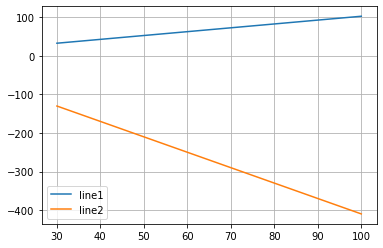

In [32]:
x = np.linspace(30, 100, 100);
y = line(1, x, 3)
x2 = np.linspace(30, 100, 100);
y2 = line(-4, x2, -10)
plt.plot(x, y, label="line1")
plt.plot(x2, y2, label="line2")
plt.grid()
plt.legend()
plt.show()

In [33]:
# Now compute l' using homogeneous coordinate for x and y and using the h_mat matrix
l = np.vstack((x, y, np.ones(x.shape[0])))
l2 = np.vstack((x2, y2, np.ones(x2.shape[0])))
h_mat_inv = np.linalg.pinv(h_mat)
print('l shape', l.shape)
print(h_mat_inv.shape)
l_prime = np.dot(h_mat_inv, l) 
l_prime = l_prime / l_prime[2]
l2_prime = np.dot(h_mat_inv, l2)
l2_prime = l2_prime / l2_prime[2]
print(l2_prime[2])

l shape (3, 100)
(3, 3)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


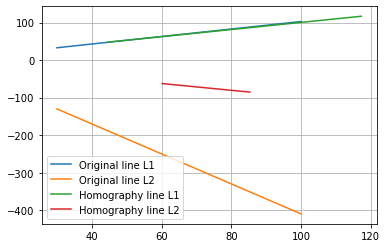

In [34]:
plt.plot(x, y, label="Original line L1")
plt.plot(x2, y2, label="Original line L2")
plt.plot(l_prime[0], l_prime[1], label="Homography line L1")
plt.plot(l2_prime[0], l2_prime[1], label="Homography line L2")
plt.grid()
plt.legend()
plt.show()

### Exercise 
Find W and W* for the points (1,0,0,1)T and (2,0,0,1)T and verify W*WT = WW*T = 0

In [35]:
p1 = np.array([[1,0,0,1]]).T
p2 = np.array([[2,0,0,1]]).T
result1 = np.dot(p2, p1.T)
print(result1)

[[2 0 0 2]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 1]]


In [49]:
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]).T
B = np.array([[0,1,0], [-1, 0, 0], [0, 0, 1]]).T
OA = np.array([[0, 0, 0]]).T
OB = np.array([[2, -1, 1]]).T
R_AB = np.dot(A, B)
R_BA =np.dot(B, A)
O_AB = OA - OB
T_VEC = np.dot(R_BA, O_AB)
point = np.array([[1, 0.5, 0.5]]).T
point_dash = np.dot(R_BA, point) + O_AB

print(point)
print(point_dash)

[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]
[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]
[[1. ]
 [0.5]
 [0.5]]
[[-2.5]
 [ 2. ]
 [-0.5]]


In [5]:
import numpy as np
import cv2 as cv

In [6]:

class Homography:
    def __init__(self, src, dst):
        self.src = src
        self.dst = dst
        self.compute_coefficents()
        self.compute_homography_matrix()

    def get_homography_matrix(self):
        return self.H

    def compute_coefficents(self):
        # print(X[:,0])
        coeffs = []
        X = self.src
        Xprime = self.dst
        for i in range(X.shape[0]):
            x = X[i]
            x_prime = Xprime[i]
            upper_coeff = np.array(
                [-x[0], -x[1], -1, 0, 0, 0, x_prime[0] * x[0], x_prime[0] * x[1], x_prime[0]])
            lower_coeff = np.array(
                [0, 0, 0, -x[0], -x[1], -1, x_prime[1] * x[0], x_prime[1] * x[1], x_prime[1]])
            coeffs.append(upper_coeff)
            coeffs.append(lower_coeff)
        self.coeffs = np.array(coeffs)

    def compute_homography_matrix(self):
        U, s, VT = np.linalg.svd(self.coeffs)
        self.H = VT[-1].reshape(3, 3)

    def wrap_perspective(self, points):
        wrapped_pts = self.H @ points.T
        return wrapped_pts / wrapped_pts[-1:, :]  # convert to homogeneous pts


class CameraData:
    image_width = 0
    image_height = 0
    board_width = None
    square_size = None
    camera_matrix = None
    distortion_coefficients = None
    rot = None
    trans = None

    def __init__(self, fs):
        self.fs = fs
        pass

    def read(self):
        self.image_width = self.fs.getNode('image_width').real()
        self.image_height = self.fs.getNode('image_height').real()
        self.board_width = self.fs.getNode('board_width').real()
        self.square_size = self.fs.getNode('square_size').real()
        self.camera_matrix = self.fs.getNode('camera_matrix').mat()
        self.distortion_coefficients = self.fs.getNode(
            'distortion_coefficients').mat()
        self.rot = self.fs.getNode('rot').mat()
        self.trans = self.fs.getNode('trans').mat()
        return self

In [8]:
    filename = './calibration.yaml'
    fs = cv.FileStorage()
    fs.open(filename, cv.FileStorage_READ)
    camera_data = CameraData(fs).read()
    mtx = camera_data.camera_matrix
    dist = camera_data.distortion_coefficients
    img1 = cv.imread('images/examImg1.png')
    h, w = img1.shape[:2]
    newcammtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    undistorted_img = cv.undistort(img1, mtx, dist)
    x, y, w, h = roi
    # cv.imshow('distorted_image', img1)
    # cv.imshow('undistorted_image', undistorted_img)
    # cv.waitKey(0)

    # Question 2
    rot_mat, _ = cv.Rodrigues(camera_data.rot)
    projection_mat = np.hstack((rot_mat, camera_data.trans))
    projection_mat = np.vstack((projection_mat, [[0, 0, 0, 1]]))
    print(projection_mat)
    tcr = projection_mat
    point = np.array([0, 0, 0, 1]).T
    result = np.dot(tcr, point)
    print('x = H x :', result)
    print('Transformation from robot origin to world-coordinate')
    print('----------------------------------------------------')
    print('START Question 3 -------')
    tcr_inv = np.linalg.pinv(tcr)
    Pr = np.array([[763.037448, 948.626962, -70.027011, -249.063249], [-27.153472,
                  413.013589, -834.460406, 146.980511], [-0.047150, 0.996552, -0.068276, -0.347539]]).T
    Pr_dash = np.array([[529.243367, 1096.649189, -65.460341, -541.617311], [-114.715323,
                       397.195667, -834.696173, 54.425526], [-0.270799, 0.960176, -0.068768, -0.625205]]).T
    n_Pr = np.dot(Pr.T, tcr_inv)
    n_Pr_dash = np.dot(Pr_dash.T, tcr_inv)
    print('Normalized Pr', n_Pr)
    print('Normalized Pr_dash', n_Pr_dash)
    print('----------------------------------------------------')
    print('START Question 4 --------')
    # k1, r1 = linalg.rq(n_Pr)
    plane = np.array([[0, 0, 1, 0]]).T
    input_points = np.array([[1, 1, 0, 1], [1, 2, 0, 1], [2, 1, 0, 1], [3, 1, 0, 1]]).T
    plane_prime = np.dot(plane.T, input_points);
    print(plane_prime)
    ps_prime = np.dot(Pr.T, input_points);
    ps_prime = ps_prime / ps_prime[-1]
    print(ps_prime)
    # print('Input points:\n', input_points)
    # print('Output points:\n', points_prime)
    homography = Homography(ps_prime, input_points)
    h_mat = homography.get_homography_matrix()
    print('Homography mat: \n')
    print(h_mat)

[[ 0.99886847  0.04661342 -0.00943217  0.08505365]
 [-0.00621709 -0.06864301 -0.99762191  0.38576577]
 [-0.04715003  0.99655172 -0.06827554 -0.34753892]
 [ 0.          0.          0.          1.        ]]
x = H x : [ 0.08505365  0.38576577 -0.34753892  1.        ]
Transformation from robot origin to world-coordinate
----------------------------------------------------
START Question 3 -------
Normalized Pr [[ 8.07053306e+02 -1.13558585e-07  9.14159726e+02  8.61649738e-08]
 [-2.97430248e-07  8.04294307e+02  4.69842924e+02 -1.51010966e-07]
 [ 4.24885849e-08  4.38201978e-07  1.00000031e+00 -1.48745766e-07]]
Normalized Pr_dash [[ 5.80380519e+02 -1.32629841e+01  1.07238313e+03 -2.13169516e+02]
 [-8.81978763e+01  8.06159682e+02  4.58224187e+02 -8.98109950e+01]
 [-2.25086862e-01  4.37867124e-03  9.74328394e-01 -2.69132649e-01]]
----------------------------------------------------
START Question 4 --------
[[0 0 0 0]]
[[2.43012307e+03 1.50851195e+03 4.01223445e+03 5.88828590e+03]
 [8.85318798e